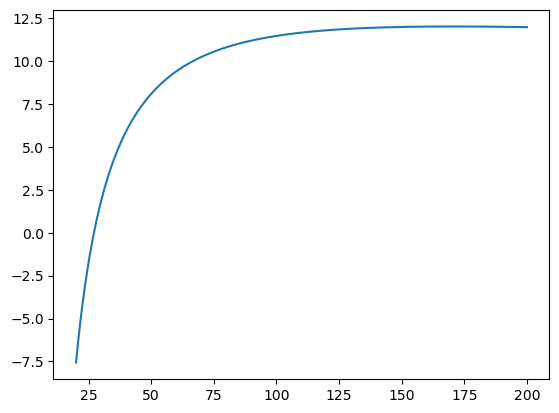

In [160]:
import numpy as np
from scipy.integrate import trapezoid
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import os 
import sys

sys.path.append(os.path.join(os.path.dirname(os.getcwd()),'Classes'))

import Handle_PotFiles
import Eam_Fitting

if os.path.basename(os.getcwd()) != 'Potentials':
    os.chdir('../Potentials')

pot_dict, _, pot_params = Handle_PotFiles.read_pot('test.1.eam.alloy')
pot_dict2, _, pot_params = Handle_PotFiles.read_pot('WHHe_test.eam.alloy')

def Beck1968(r):

    A = 398.7
    a = 0.675
    alpha = 4.390
    beta = 3.746e-4

    return  A*np.exp(-alpha*r - beta*r**6) - (0.869/((r**2 + a**2)**3)) * (1 + ((2.709 + 3*a**2)/(r**2 + a**2)))

def eam(pot, r, dr):
    
    r_idx = int(r // dr)
    
    if r_idx >= len(pot) -1:

        return 0
    
    else:
        x = (r % dr) / dr

        y1 = pot[r_idx]

        y2 = pot[r_idx + 1]

        return (y2 - y1)*x + y1

def virial_2(r, phi, T):

    kb = 8.6173303e-5
    beta = 1 / (kb * T)
    y = ( 1 - np.exp(-beta * phi) ) * r**2

    return 2* np.pi* (trapezoid(y, r) + r[0]**3/3)

# phi = data[:,2]
r = np.linspace(0.9, 5, 100)

r_pot = np.linspace(0, pot_params['rc'], pot_params['Nr'])

he_he = pot_dict['He-He'][1:]/r_pot[1:]

phi_eam = np.zeros((len(r),))

for i in range(len(r)):

    phi_eam[i] = eam(he_he, r[i], pot_params['dr'])


phi = Beck1968(r)

N = 200

kb = 8.6173303e-5

T_arr = np.linspace(20, 200, N)

B2 = np.zeros(T_arr.shape)

B2_eam = np.zeros(T_arr.shape)

for i, T in enumerate(T_arr):

    B2[i] = virial_2(r, phi, T)

    B2_eam[i] = virial_2(r, phi_eam, T)

conv = 6.02214e-1

B2 = B2*conv
plt.plot(T_arr, B2)
# plt.plot(T_arr, B2_eam)

# print(B2.max(), T_arr[B2.argmax()])

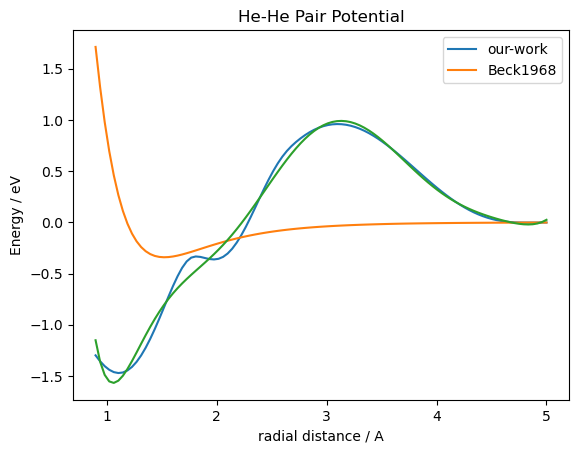

In [161]:
zbl = Eam_Fitting.ZBL(2, 2)

r = np.linspace(0.9, 5, 100)

r_pot = np.linspace(0, pot_params['rc'], pot_params['Nr'])

he_he2 = pot_dict2['He-He'][1:]/r_pot[1:]

phi_eam2 = np.zeros((len(r),))

for i in range(len(r)):

    phi_eam2[i] = eam(he_he2, r[i], pot_params['dr'])

y = phi_eam - zbl.eval_zbl(r)

fit = np.polyfit(r, y, deg=9)

plt.plot(r, phi_eam - zbl.eval_zbl(r), label='our-work')
plt.plot(r, phi_eam2 - zbl.eval_zbl(r), label='Beck1968')
plt.plot(r, np.polyval(fit, r))

plt.title('He-He Pair Potential')
plt.xlabel('radial distance / A')
plt.ylabel('Energy / eV')
plt.legend()

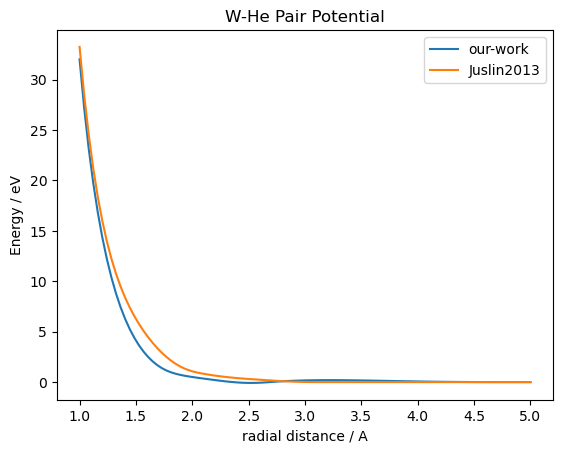

In [164]:
zbl = Eam_Fitting.ZBL(74, 2)

r = np.linspace(1, 5, 100)

r_pot = np.linspace(0, pot_params['rc'], pot_params['Nr'])

w_he2 = pot_dict2['W-He'][1:]/r_pot[1:]

phi_eam2 = np.zeros((len(r),))

for i in range(len(r)):

    phi_eam2[i] = eam(w_he2, r[i], pot_params['dr'])

r_pot = np.linspace(0, pot_params['rc'], pot_params['Nr'])

w_he = pot_dict['W-He'][1:]/r_pot[1:]

phi_eam = np.zeros((len(r),))

for i in range(len(r)):

    phi_eam[i] = eam(w_he, r[i], pot_params['dr'])

plt.plot(r, phi_eam, label='our-work')
plt.plot(r, phi_eam2, label='Juslin2013')

plt.title('W-He Pair Potential')
plt.xlabel('radial distance / A')
plt.ylabel('Energy / eV')
plt.legend()

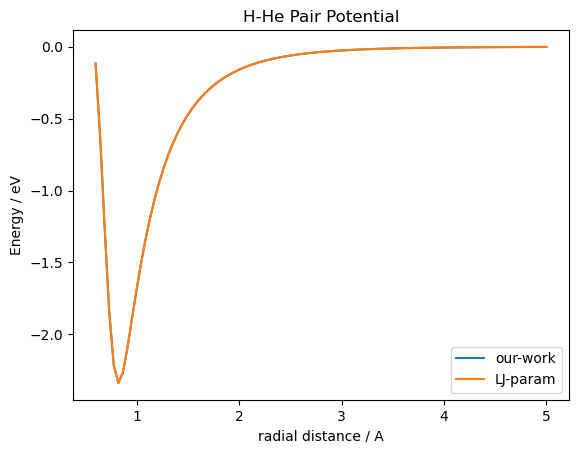

In [163]:
zbl = Eam_Fitting.ZBL(1, 2)

r = np.linspace(0.6, 5, 100)

r_pot = np.linspace(0, pot_params['rc'], pot_params['Nr'])

h_he2 = pot_dict2['H-He'][1:]/r_pot[1:]

phi_eam2 = np.zeros((len(r),))

for i in range(len(r)):

    phi_eam2[i] = eam(h_he2, r[i], pot_params['dr'])


h_he = pot_dict['H-He'][1:]/r_pot[1:]

phi_eam = np.zeros((len(r),))

for i in range(len(r)):

    phi_eam[i] = eam(h_he, r[i], pot_params['dr'])

plt.plot(r, phi_eam- zbl.eval_zbl(r), label='our-work')
plt.plot(r, phi_eam2- zbl.eval_zbl(r), label='LJ-param')


plt.title('H-He Pair Potential')
plt.xlabel('radial distance / A')
plt.ylabel('Energy / eV')
plt.legend()